In [1]:
from QuiltLoader.QuiltLoader import QuiltLoader as ql

# QuiltLoader can handle both 'org/pkg'
data = ql('aics/random_sample')

# or preload
from quilt.data.aics import random_sample
data = ql(random_sample)

# we have subscriptable nodes now
fov = data['fovs'][15]
img = fov['image']
print(img)

TIFF file: c4d972a692355810292324066d64083464423d93cf47ed8df67ee5fe982563df, 395 MiB, little endian, ome, 490 pages


In [2]:
# can pass different load functions in
import tifffile as tfle
loaders = {'image': tfle.imread}

# no org given, defaults to aics
data = ql('random_sample', load_functions=loaders)
fov = data['fovs'][15]
img = fov['image']
print(img.shape)

(70, 7, 624, 924)


In [3]:
# look at those no loads
meta = fov['info']
print(meta.keys())

# you can do inline opening and continuation
print(fov['info']['cell_segs'][0])

dict_keys(['plate_type', 'plate_id', 'plate_barcode', 'population_id', 'passage', 'clone', 'parent_plate_id', 'image_ids', 'seeding_density', 'cellbatch', 'source_plate_id', 'cell_viability', 'well_type', 'well_name', 'concentration', 'coating_type', 'seed_date', 'colony_ids', 'location', 'content_type', 'instrument', 'channels', 'plates', 'lines', 'wells', 'cell_segs', 'nuclei_segs', 'structure_segs'])
cell_plate_3500000899_well_E4_100X_20170515_1_Scene_05_P5_E04


In [4]:
# iterable nodes too
for i, line in enumerate(data['lines']):
    print(i, line['info']['line'])

0 AICS-10
1 AICS-11
2 AICS-12
3 AICS-13
4 AICS-16
5 AICS-17
6 AICS-23
7 AICS-24
8 AICS-25


In [5]:
# can even slice
for i, well in enumerate(data['wells'][0:6:2]):
    print(i, well)

0 <GroupNode>
image/
info/

1 <GroupNode>
image/
info/

2 <GroupNode>
image/
info/



In [6]:
wells_df = data['wells'].as_dataframe()
print(wells_df)

    cell_viability cellbatch clone coating_type colony_ids  concentration  \
0             97.1      None   105     Matrigel         []         3000.0   
1              NaN      None  None         None         []            NaN   
2             98.8      None   105     Matrigel         []         3000.0   
3             99.2      None   105     Matrigel         []         2500.0   
4             98.7      None  None     Matrigel         []         2000.0   
5            100.0      None   105     Matrigel         []         2500.0   
6            100.0      None   105     Matrigel         []         2500.0   
7             96.4      None    27     Matrigel         []         3000.0   
8             95.8      None    27     Matrigel         []         3000.0   
9             95.8      None    27     Matrigel         []         3000.0   
10            98.8      None    27     Matrigel         []         3000.0   
11            99.4      None    27     Matrigel         []         3000.0   

In [7]:
associates = fov.get_associates()
print(associates)

{'plates': [<GroupNode>
info/
], 'wells': [<GroupNode>
image/
info/
], 'lines': [<GroupNode>
info/
], 'cell_segs': [<GroupNode>
image/
info/
], 'nuclei_segs': [<GroupNode>
image/
info/
], 'structure_segs': [<GroupNode>
image/
info/
]}


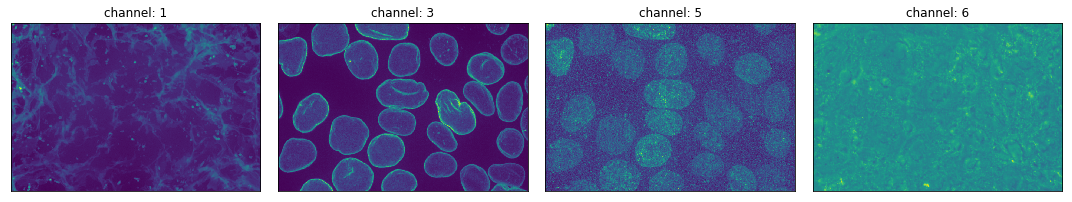

In [8]:
fov.display_channels()

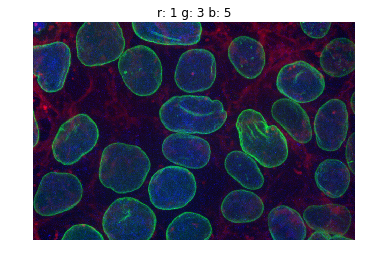

In [9]:
fov.display_rgb()

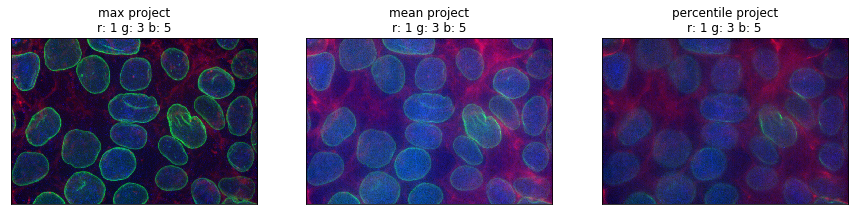

In [10]:
fov.display_rgb(use='all')

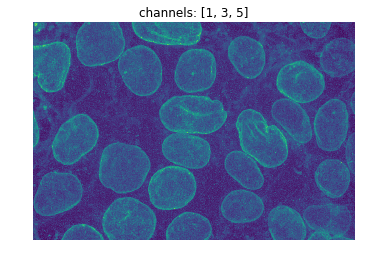

In [11]:
fov.display_stack()

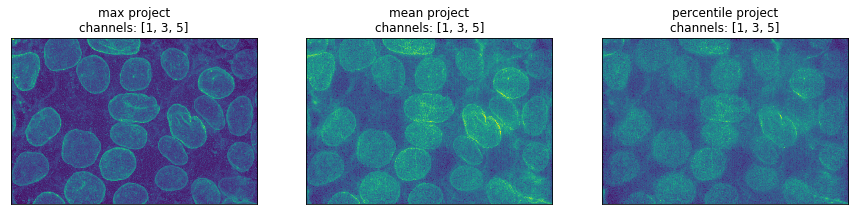

In [12]:
fov.display_stack(use='all')

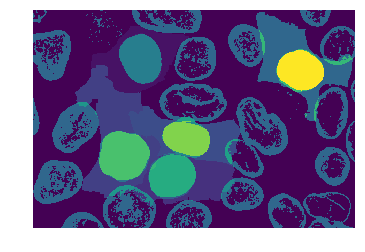

In [13]:
fov.display_segs()

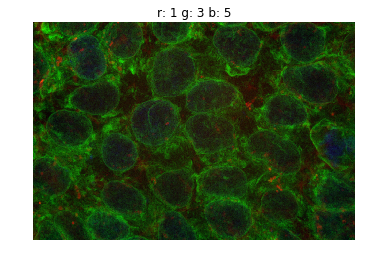

In [14]:
data['lines'][0].display_rgb()

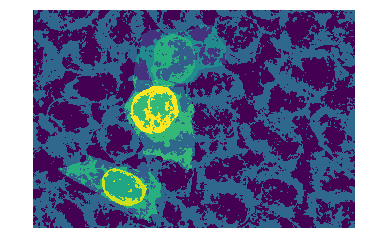

In [15]:
data['lines'][0].display_segs()

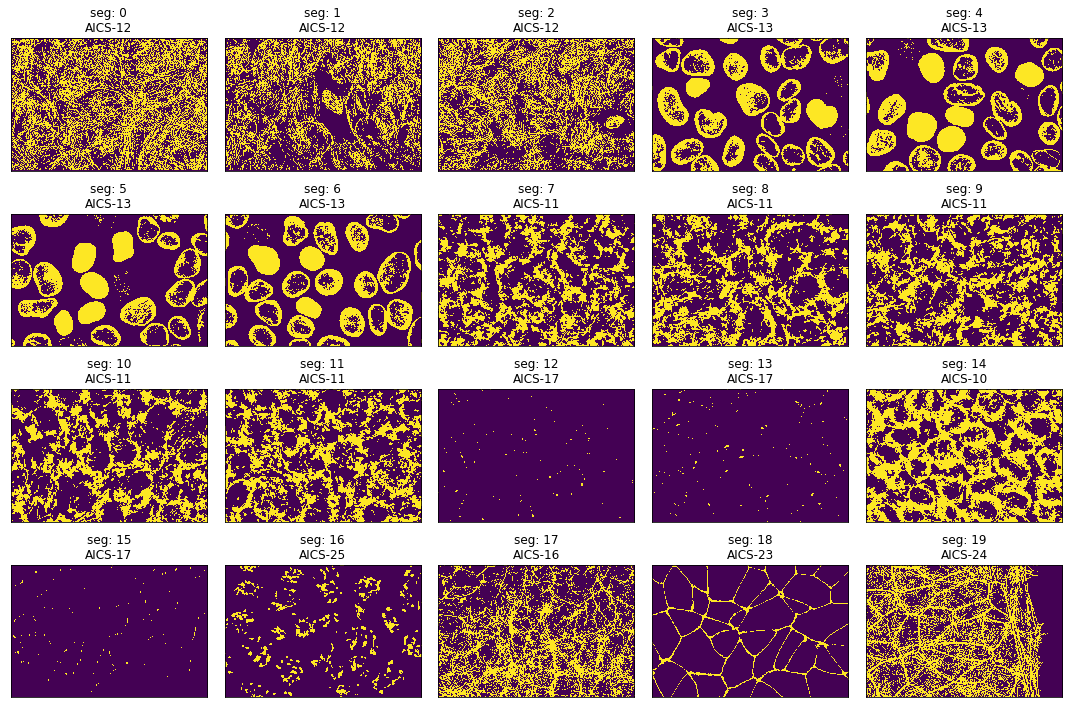

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n_segs = len(data['structure_segs'])
fig, axes = plt.subplots(int(n_segs / 5), 5, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    max_project = np.max(data['structure_segs'][i]['image'], 0)
    ax.imshow(max_project)
    ax.set(xticks=[], yticks=[])
    ax.set_title('seg: ' + str(i) + '\n' + data['lines'][data['structure_segs'][i]['info']['lines'][0]]['info']['line'])

plt.tight_layout()